In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

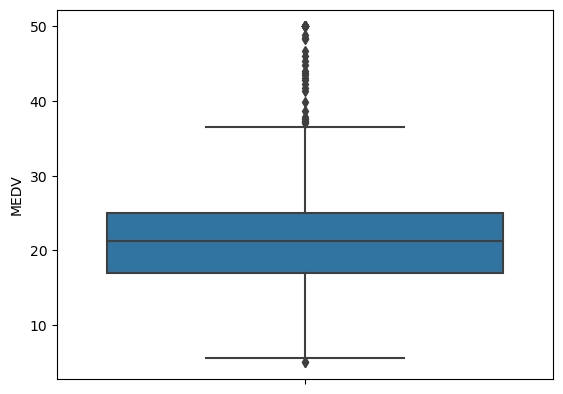

In [14]:
# Display a Boxplot for the "Median value of owner-occupied homes 
box = sns.boxplot(y = 'MEDV', data = boston_df)

In [9]:
#The boxplot shown here appears to be skewed to the right.The median is close to the first quartile and the third quartile is further from the median.There are no outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

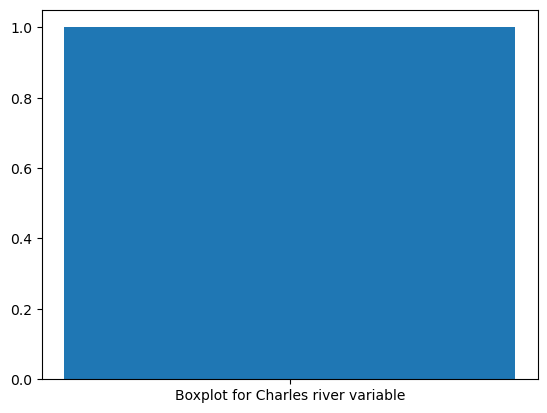

In [12]:
#Provide a  bar plot for the Charles river variable
data = boston_df['CHAS']
labels = "Boxplot for Charles river variable"
plt.bar(labels,data)
plt.show

In [13]:
# 1 if tract bounds variable;0 otherwise

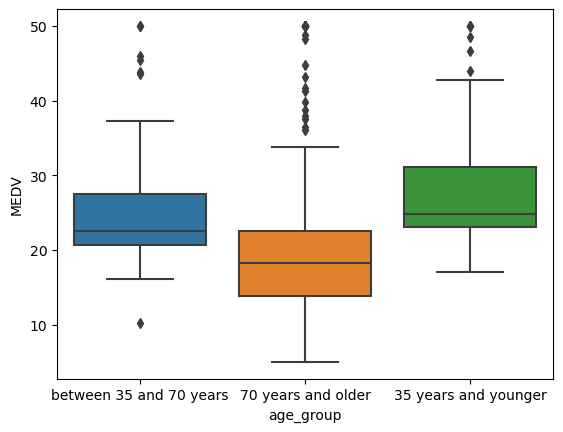

In [16]:
#boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
boxplot = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)



In [17]:
#The boxplot appears to be relatively symmetric and has a few outliers on the lower end of the distribution.
#The median is around 70, 

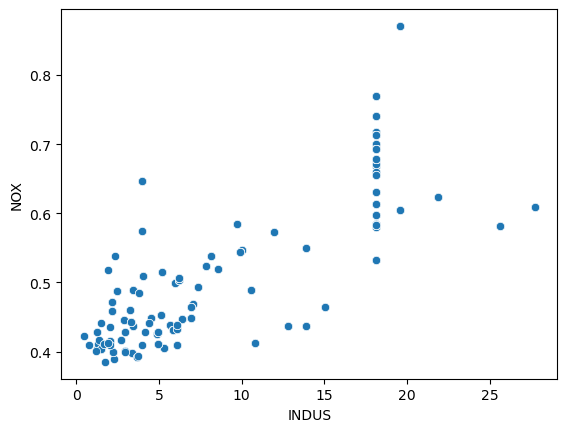

In [18]:
#scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
#NOX - nitric oxides concentration
#INDUS - proportion of non-retail business 
scatterplot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)

In [19]:
#The Scatter Plot shows that there is high correlation between the Nitric Oxides concentration and Proportion of non-retail business acres per town. 

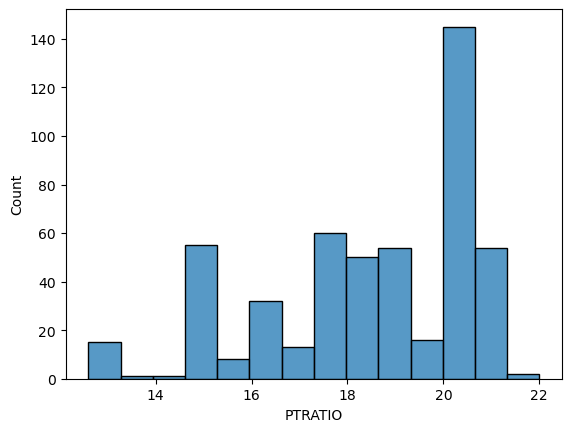

In [21]:
# histogram for the pupil to teacher ratio variable
histogramplot =  sns.histplot(boston_df['PTRATIO'])

In [22]:
#The histogram above appears to tbe skewed to the left which means it is a neagtive skewed distribution.

In [23]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)
#H0:µ1=µ2("there is no difference in median value of houses bounded by the Charles river")
#H1:µ1≠µ2("there is a difference in median value of houses bounded by the Charles river")
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')


LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [24]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [25]:
#Conclusion: Since the p-value is less than 0.05 we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles river variable

In [31]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#H0:µ1=µ2=µ3(the three population means are equal)
#H1:At least one of the means differ
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [33]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [34]:
#one way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [35]:
#Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof 

In [36]:
#Conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H0:There is no relationship between NOX and INDUS.
#H1:There is a relationship between NOX and INDUS.
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

In [37]:
#Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

In [38]:
#Impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#H0:β1=0 
#H1:β1≠0 
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.21e-08
Time:                        18:40:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV.